In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib, json

# #load data
# k_df = pd.read_csv('data/kinneret_level.csv')
# ds_df = pd.read_csv('data/dead_sea_level.csv')

# #rename columns
# ds_df = ds_df.rename(columns={'תאריך מדידה':'date','מפלס':'ds_level'})
# k_df = k_df.rename(columns={'תאריך מדידה':'date','מפלס הכנרת במטרים':'k_level'})



In [7]:
#LOAD DEAD SEA DATA
url = 'https://data.gov.il/api/action/datastore_search?resource_id=823479b4-4771-43d8-9189-6a2a1dcaaf10&limit=10000'
fileobj = urllib.request.urlopen(url) 
data = json.loads(fileobj.read())
ds_df = pd.DataFrame(data['result']['records'])
ds_df = ds_df.rename(columns={'תאריך מדידה':'date','מפלס':'ds_level'}).drop(columns='_id')
ds_df['ds_level'] = ds_df['ds_level'].astype('float')
#sort by date
ds_df['date'] = pd.to_datetime(ds_df['date'], format='%d/%m/%Y')
ds_df = ds_df.sort_values(by='date').reset_index(drop=True)
ds_df['year'] = ds_df['date'].dt.year


ds_df.head()

,ds_level,date,year
0,-398.95,1976-10-01,1976
1,-399.01,1976-11-01,1976
2,-399.12,1976-12-01,1976
3,-399.05,1977-01-01,1977
4,-399.04,1977-02-01,1977


In [8]:
#LOAD SEA GALILEE DATA
url = 'https://data.gov.il/api/action/datastore_search?resource_id=2de7b543-e13d-4e7e-b4c8-56071bc4d3c8&limit=15000'
fileobj = urllib.request.urlopen(url) 
data = json.loads(fileobj.read())
k_df = pd.DataFrame(data['result']['records'])
k_df = k_df.rename(columns={'Survey_Date':'date','Kinneret_Level':'k_level'}).drop(columns='_id')
k_df.head()
# #sort by date
k_df['date'] = pd.to_datetime(k_df['date'])
k_df = k_df.sort_values(by='date').reset_index(drop=True)
k_df['year'] = k_df['date'].dt.year

k_df.head()

,k_level,date,year
0,-210.02,1966-09-01,1966
1,-210.13,1966-09-15,1966
2,-210.27,1966-10-01,1966
3,-210.32,1966-10-15,1966
4,-210.39,1966-11-01,1966


In [9]:
# #datetime
# k_df['date'] = pd.to_datetime(k_df['date'],format='%d %b %Y')
# ds_df['date'] = pd.to_datetime(ds_df['date'],format='%d/%m/%Y')
# k_df['year'] = k_df['date'].dt.year
# ds_df['year'] = ds_df['date'].dt.year


In [10]:
#clean mistake
k_df.loc[k_df['date']=='2009-09-19','k_level'] = np.nan

In [11]:
#merge df
k_ds_df = k_df.merge(ds_df, on=['date','year'], how='outer').sort_values(by='date')
#filter data from first available dead sea data
k_ds_df_1976 = k_ds_df.loc[k_ds_df.date >= '1976-10-01'].reset_index(drop=True)


In [12]:
#start level
k_start_level = k_ds_df_1976['k_level'].iloc[0]
ds_start_level = k_ds_df_1976['ds_level'].iloc[0]
print("Kinneret start level (1976): {}".format(k_start_level))
print("Dead Sea start level (1976): {}".format(ds_start_level))

Kinneret start level (1976): -210.99
Dead Sea start level (1976): -398.95


In [14]:
#dif
k_ds_df_1976['k_dif'] = k_ds_df_1976['k_level'] - k_start_level
k_ds_df_1976['ds_dif'] = k_ds_df_1976['ds_level'] - ds_start_level
k_ds_df_1976.to_csv('data/merged_ds_k.csv')
#create clean tables for graph
ds_final=k_ds_df_1976[['date','ds_dif']].dropna().reset_index(drop=True)
k_final=k_ds_df_1976[['date','k_dif']].dropna().reset_index(drop=True)

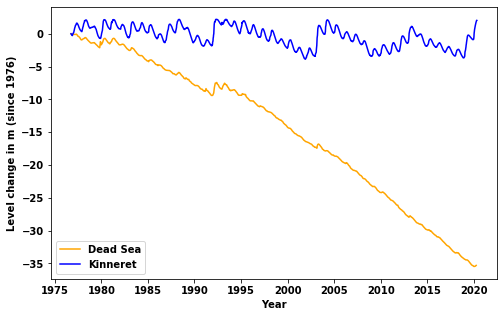

In [22]:
#graph
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ds_final['date'], ds_final['ds_dif'],label='Dead Sea', color='orange')
ax.plot(k_final['date'], k_final['k_dif'],label='Kinneret',color='blue' )
ax.legend(loc='best')
ax.set_xlabel('Year')
ax.set_ylabel('Level change in m (since 1976)')
fig.savefig('KinneretVsDeadSea.png', dpi=300)